# Pipeline Clustering Verfahren

# Inhaltsverzeichnis
1. [Daten einlesen](#introduction)
    1. [Daten aussuchen](#subparagraph1)
    2. [Daten zusammenführen](#subparagraph2)
    3. [Daten vorbereiten](#subparagraph3)
2. [K-Means](#paragraph1)
    1. [PCA davor](#subparagraph2.1)
    2. [PCA danach](#subparagraph2.2)
3. [Hierarchical Clustering](#paragraph2)
    1. [nicht reduziert](#subparagraph3.1)
    2. [reduziert](#subparagraph3.2)
4. [Gaussian Mixture Model](#paragraph3)
5. [Bayes Mixture Model](#paragraph4)

### Daten einlesen <a name="introduction"></a>

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import squareform
from sklearn.preprocessing import normalize
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
# Import necessary libraries
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
import itertools
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import manifold
import sklearn.datasets 
from sklearn.preprocessing import normalize
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture 

In [2]:
df = pd.read_csv("../song_decades_long.csv")
df.head()

,Unnamed: 0,artist,decades,text,stemmed_text,POS,Genre1,genre1,number_of_tokens,number_of_types
0,0,"""Weird Al"" Yankovic",1980s,potato skins potato cakes hash browns and i...,potato skin potato cake hash brown and instan...,french plain enough greasy sour lumpy tough en...,Rock,antiviral pop,12745.0,2264.0
1,37,"""Weird Al"" Yankovic",1990s,as i walk through the valley where i harvest m...,as i walk through the valley where i harvest ...,plain perfect fancy amish amish hard amish ami...,Rock,antiviral pop,10803.0,2317.0
2,65,"""Weird Al"" Yankovic",2000s,jillian was her name she was sweeter than asp...,jillian wa her name she wa sweeter than aspar...,same gorgeous perfect close sweet young ripe p...,Rock,antiviral pop,4352.0,1159.0
3,76,"""Weird Al"" Yankovic",2010s,my mama told me when i was hatched act like a...,my mama told me when i wa hatch act like a su...,red hard sure swiss crazy little okay crazy ev...,Rock,antiviral pop,2077.0,705.0
4,81,*NSYNC,1990s,here we go here we go one more time eve...,here we go here we go one more time everybodi...,fine fine free right fine right fine free time...,Electronic,boy band,1786.0,345.0


In [3]:
df[df['Genre1'] == 'Pop']

,Unnamed: 0,artist,decades,text,stemmed_text,POS,Genre1,genre1,number_of_tokens,number_of_types
7,102,ABBA,1970s,i'll never know why i had to go why i had to ...,i 'll never know whi i had to go whi i had to...,lousy rotten tough enough good new good new ne...,Pop,europop,8618.0,1070.0
8,130,ABBA,1980s,take it easy with me please touch me gently ...,take it easi with me pleas touch me gentli li...,easy slow andante soft light andante strong st...,Pop,europop,5963.0,1131.0
11,179,Adele,2000s,right under my feet there's air made of bricks...,right under my feet there 's air made of bric...,weak broken only only only only own dead only ...,Pop,british soul,2439.0,436.0
12,187,Adele,2010s,[verse 1] i will leave my heart at the door ...,[ vers 1 ] i will leav my heart at the door i...,scared scared pre chorus wrong last sure only ...,Pop,british soul,6832.0,793.0
18,262,Air Supply,1980s,we shared such a special love it seem to have...,we share such a special love it seem to have ...,special mejust future sure low sure love end d...,Pop,adult standards,2208.0,414.0
...,...,...,...,...,...,...,...,...,...,...
974,12566,Wham!,1980s,last christmas i gave you my heart but the...,[ choru : ] last christma i gave you my heart...,last next special last next special shy last n...,Pop,dance rock,3027.0,643.0
978,12620,Whitney Houston,1980s,i believe the children are our are future tea...,i believ the children are our are futur teach...,future lonely easy special lonely way beauty s...,Pop,dance pop,3050.0,569.0
979,12631,Whitney Houston,1990s,this is the heart break hotel this is the hea...,thi is the heart break hotel thi is the heart...,wrong wrong heartbreak heart break hotel heart...,Pop,dance pop,6790.0,896.0
980,12654,Whitney Houston,2000s,the stars must be aligned tonight i believe t...,the star must be align tonight i believ thi h...,sane pressed many busy enough pressed possible...,Pop,dance pop,4988.0,736.0


In [3]:
data1 = df[df['artist'] == 'High School Musical Cast']
data2 = df[df['artist'] == 'Whitney Houston']

spezielle Daten auswählen <a name="subparagraph1"></a>

In [23]:
data1 = df[df['artist'] == '*NSYNC']
data2 = df[df['artist'] == 'Arrogant Worms']

In [15]:
data1 = df[df['artist'] == 'Katy Perry']
data2 = df[df['artist'] == 'Olly Murs']
popartist = pd.concat([data1, data2], axis = 0)

In [4]:
data1 = df[df['artist'] == 'Eminem']
data2 = df[df['artist'] == 'ABBA']

In [5]:
data = pd.concat([data1, data2], axis = 0)

In [16]:
ohnerock = df[df.Genre1!='Rock']
ohnerock = ohnerock[ohnerock.Genre1!='Pop']

In [17]:
alternative = df[df.genre1=='alternative rock']
dance = df[df.genre1=='dance pop']
alt_danc = pd.concat([alternative, dance], axis = 0)
alt_danc

,Unnamed: 0,artist,decades,text,stemmed_text,POS,Genre1,genre1,number_of_tokens,number_of_types
66,914,Blur,1990s,he's a twentieth century boy with his hands o...,he 's a twentieth centuri boy with hi hand on...,twentieth sick seamless dear other la la la tw...,Rock,alternative rock,2979.0,760.0
98,1341,Cake,1990s,well your cd collection looks shiny and costly...,well your cd collect look shini and costli . ...,shiny costly much bad much black much much muc...,Rock,alternative rock,2134.0,568.0
99,1348,Cake,2000s,adjectives on the typewriter he moves his wor...,adject on the typewrit he move hi word like a...,frenzied tight white plastic nervous tense hot...,Rock,alternative rock,2050.0,501.0
131,1738,Counting Crows,1990s,blue morning blue morning wrapped in strands ...,blue morn blue morn wrap in strand of fist an...,blue own nice slow happy safe warm sorry wrong...,Rock,alternative rock,5774.0,1118.0
132,1756,Counting Crows,2000s,they paved paradise and put up a parking lot ...,they pave paradis and put up a park lot with ...,pink swinging hot late last big yellow parking...,Rock,alternative rock,4567.0,975.0
...,...,...,...,...,...,...,...,...,...,...
917,11904,Train,2010s,knock knock who's there? two thousand and tw...,knock knock who 's there ? two thousand and t...,new dead alone good happy little right right d...,Rock,dance pop,7811.0,1242.0
978,12620,Whitney Houston,1980s,i believe the children are our are future tea...,i believ the children are our are futur teach...,future lonely easy special lonely way beauty s...,Pop,dance pop,3050.0,569.0
979,12631,Whitney Houston,1990s,this is the heart break hotel this is the hea...,thi is the heart break hotel thi is the heart...,wrong wrong heartbreak heart break hotel heart...,Pop,dance pop,6790.0,896.0
980,12654,Whitney Houston,2000s,the stars must be aligned tonight i believe t...,the star must be align tonight i believ thi h...,sane pressed many busy enough pressed possible...,Pop,dance pop,4988.0,736.0


In [18]:
eighties = df[df.decades=='1980s']

Daten zusammenführen <a name="subparagraph2"></a>

In [54]:
bands = pd.concat([data1, data2], axis = 0)

Daten vorbereiten <a name="subparagraph3"></a>

In [56]:
tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(data.POS.values.astype(str))
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

## K-Means <a name="paragraph2"></a>

PCA davor <a name="subparagraph2.1"></a>

In [49]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

Text(0.5, 1.0, 'PCA')

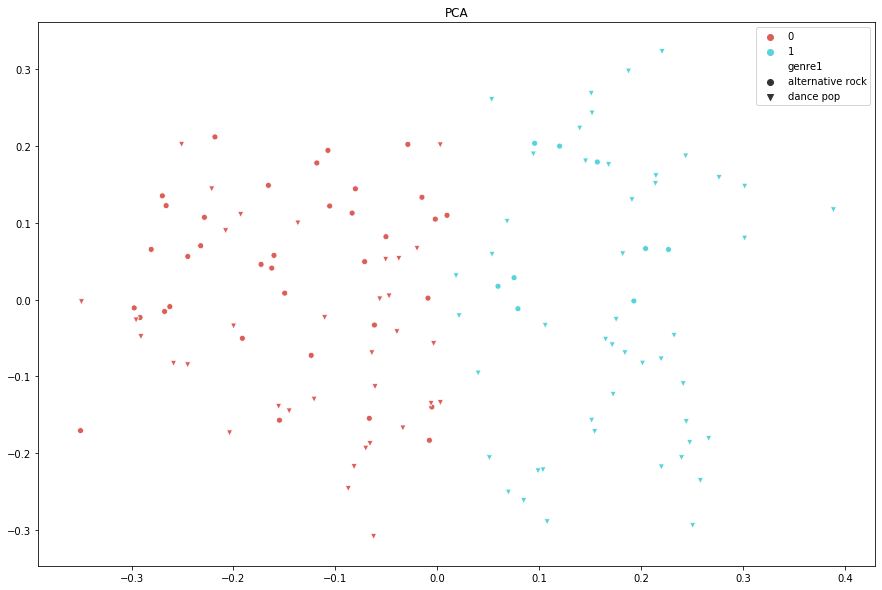

In [50]:
markers = ('o', 'v', '^', '<', '>', 's', 'p','8', '*', 'h', 'H', 'D', 'd', 'P', 'X', 'o', 'v', '^')
plt.figure(figsize=(15,10))
sns.scatterplot(Y_sklearn[:, 0], Y_sklearn[:, 1],hue=prediction, style=data.genre1, markers=markers, palette=sns.color_palette("hls", len(np.unique(prediction))))
plt.title('PCA')

Text(0.5, 1.0, 'PCA')

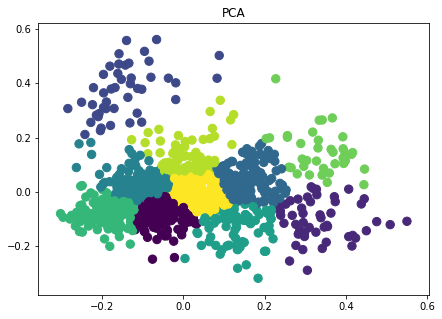

In [5]:
plt.figure(figsize=(7,5))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=70, cmap='viridis')
plt.title('PCA')
#plt.savefig('K_Means/PCA_K-Means_Lyrics.png', bbox_inches = "tight")

PCA danach <a name="subparagraph2.2"></a>

In [57]:
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(tf_idf_array)
prediction = kmeans.predict(tf_idf_array)

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

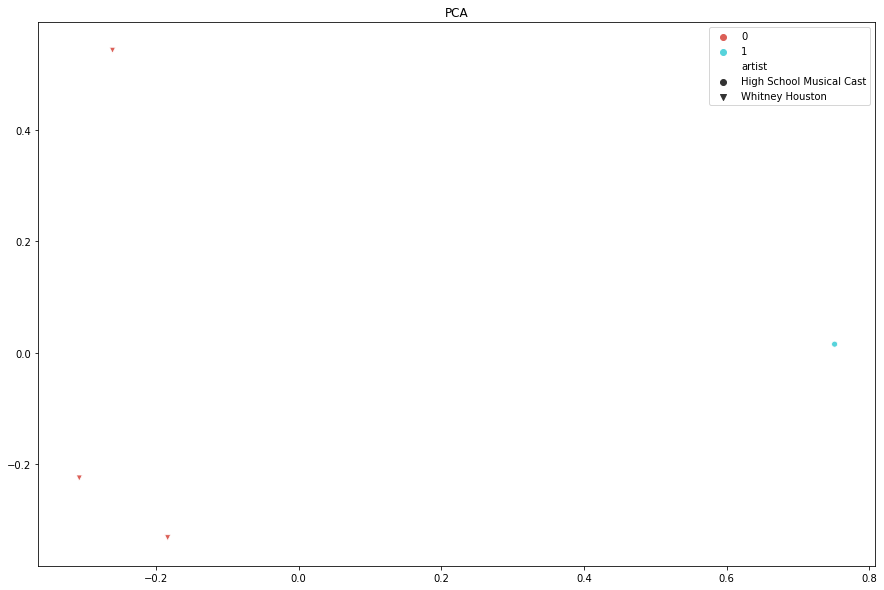

In [58]:
markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X', 'o', 'v', '^')
plt.figure(figsize=(15,10))
sns.scatterplot(Y_sklearn[:, 0], Y_sklearn[:, 1],hue=prediction, style=data.artist, markers=markers, palette=sns.color_palette("hls", len(np.unique(prediction))))
plt.title('PCA')
plt.savefig('K-Means_Stage_Screen_Pop.png', bbox_inches = "tight")

## HC <a name="paragraph2"></a>

In [59]:
def linkage_matrix(n_samples, children, distances):
    """
    create a linkage matrix for the dendogram method in scipy
    n_samples: int, number of samples
    children: list of lists, clustered data points (should be 2)
    distances: list of distances between nodes
    """
    # Create linkage matrix
    

    # create the counts of samples under each node
    counts = np.zeros(children.shape[0])
    for i, merge in enumerate(children):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    return np.column_stack([children, distances, counts]).astype(float)

nicht reduziert <a name="subparagraph3.1"></a>

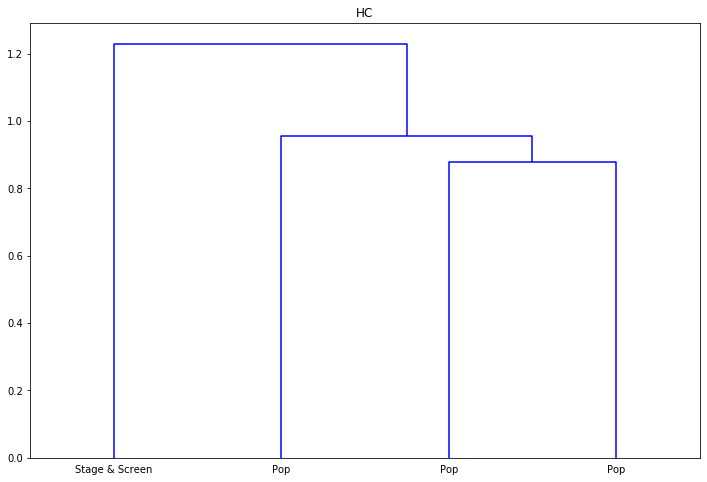

In [60]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(tf_idf_array)
link_matrix = linkage_matrix(tf_idf_array.shape[0], model.children_, model.distances_)
plt.figure(figsize=(12,8))
plt.title('HC')

dendrogram(link_matrix, labels = data.Genre1.values, leaf_font_size=10);
plt.savefig('HC_Stage_Screen_Pop.png', bbox_inches = "tight")

reduziert <a name="subparagraph3.2"></a>

In [26]:
dfs_cleans = data.sample(frac=0.008)
tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(dfs_cleans.POS.values.astype(str))
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()


model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(tf_idf_array)
link_matrix = linkage_matrix(tf_idf_array.shape[0], model.children_, model.distances_)
plt.figure(figsize=(12,8))
plt.title('HC')

dendrogram(link_matrix, labels = data.artist.values, leaf_font_size=10);
#plt.savefig('../images/HC/hc_alternative_rock_dance_pop.png', bbox_inches = "tight")

ValueError: empty vocabulary; perhaps the documents only contain stop words

## Gaussian Mixture Model <a name="paragraph3"></a>

In [67]:
tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(popartist.POS.values.astype(str))
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

#### BIC

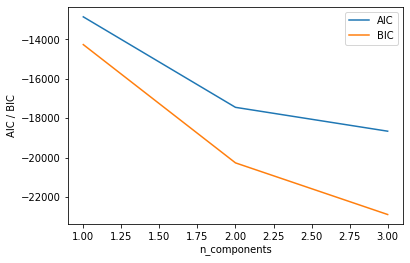

In [76]:
n_components = np.arange(1, 4)
BIC = np.zeros(n_components.shape)
AIC = np.zeros(n_components.shape)

for i, n in enumerate(n_components):
    clf = GaussianMixture(n_components=n,
              covariance_type='diag')
    clf.fit(tf_idf_array)

    AIC[i] = clf.aic(tf_idf_array)
    BIC[i] = clf.bic(tf_idf_array)

plt.figure()
plt.plot(n_components, AIC, label='AIC')
plt.plot(n_components, BIC, label='BIC')
plt.legend(loc=0)
plt.xlabel('n_components')
plt.ylabel('AIC / BIC')
plt.savefig('GMM_images/BIC_popartist_diag')

In [21]:
def compute_PCA(text):
    pca = PCA(n_components = 2)
    Y = pca.fit_transform(text)
    return Y

#### hard clustering

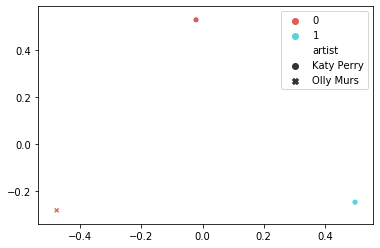

In [84]:
gmm = GaussianMixture(n_components=2, n_init=10, covariance_type='diag').fit(tf_idf_array)
prediction = gmm.predict(tf_idf_array)
Y = compute_PCA(tf_idf_array)
# plt.figure(figsize=(15,10))
sns.scatterplot(Y[:, 0], Y[:, 1],hue=prediction, style=popartist.artist, palette=sns.color_palette("hls", len(np.unique(prediction))))
plt.savefig('GMM_images/gmm_popartist_diag')

In [52]:
print(gmm.means_)
print('\n')
print(gmm.covariances_)

[[0.01668895 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00951874 0.00317291 ... 0.00317291 0.00673667 0.00537169]]


[[ 1.00000000e-06  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.36909486e-04  4.53031621e-05 ...  4.53031621e-05
   5.48289735e-06 -3.83488020e-05]
 [ 0.00000000e+00  4.53031621e-05  1.61010540e-05 ...  1.51010540e-05
   1.82763245e-06 -1.27829340e-05]
 ...
 [ 0.00000000e+00  4.53031621e-05  1.51010540e-05 ...  1.61010540e-05
   1.82763245e-06 -1.27829340e-05]
 [ 0.00000000e+00  5.48289735e-06  1.82763245e-06 ...  1.82763245e-06
   2.13993252e-05  2.40463249e-05]
 [ 0.00000000e+00 -3.83488020e-05 -1.27829340e-05 ... -1.27829340e-05
   2.40463249e-05  4.42826481e-05]]


#### soft clustering

[[1. 0.]
 [0. 1.]
 [1. 0.]]


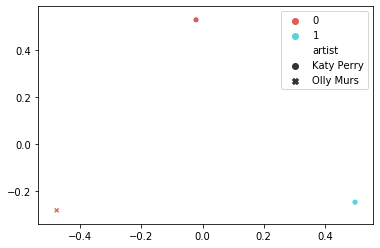

In [82]:
probs = gmm.predict_proba(tf_idf_array)
print(probs[:5].round(3))
size = 50 * probs.max(1) ** 2  # square emphasizes differences
# plt.figure(figsize=(15,10))
sns.scatterplot(Y[:, 0], Y[:, 1],hue=prediction,style=popartist.artist,palette=sns.color_palette("hls", len(np.unique(prediction))))
plt.savefig('GMM_images/gmm_popartist_soft_diag')

## Bayes GMM <a name="paragraph4"></a>

https://www.geeksforgeeks.org/ml-variational-bayesian-inference-for-gaussian-mixture/

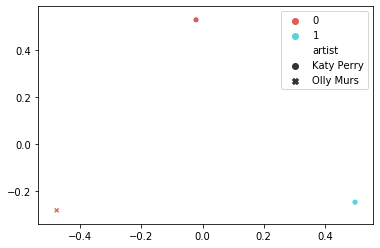

In [87]:
# Building and training the model 
bgmm = BayesianGaussianMixture(n_components=2, n_init=10, covariance_type ='diag').fit(tf_idf_array) 
Y = compute_PCA(tf_idf_array)

# Storing the labels 
prediction = bgmm.predict(tf_idf_array) 
# print((prediction)) 
# plt.figure(figsize=(15,10))
sns.scatterplot(Y[:, 0], Y[:, 1],hue=prediction, style=popartist.artist, palette=sns.color_palette("hls", len(np.unique(prediction))))
plt.savefig('GMM_images/bgmm_popartist_diag')

In [62]:
bgmm.converged_

True